# Joint rank diagnostic plot

This notebooks demonstrates using the JIVE joint rank diagnostic plot to estimate the joint rank. This diagnostic plot is discussed in Section 2 of [Angle-Based Joint and Individual Variation Explained](https://arxiv.org/pdf/1704.02060.pdf).

In [1]:
from jive.Jive import Jive

import numpy as np

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load toy data

In [3]:
X = np.load('data/toy_ajive_fig2_x.npy')
Y = np.load('data/toy_ajive_fig2_y.npy')

# Compute initial signal space extraction

In [4]:
blocks = [X, Y]

jive = Jive(blocks)

# initial signal space extraction
jive.compute_initial_svd()
jive.set_signal_ranks([2, 3])

# joint matrix SVD
jive.compute_joint_svd()

# Joint rank diagnostic

In [5]:
# sample the wedin and random direction bound distribution
jive.estimate_joint_rank(num_samples=1000, wedin_percentile=95, random_percentile=5)

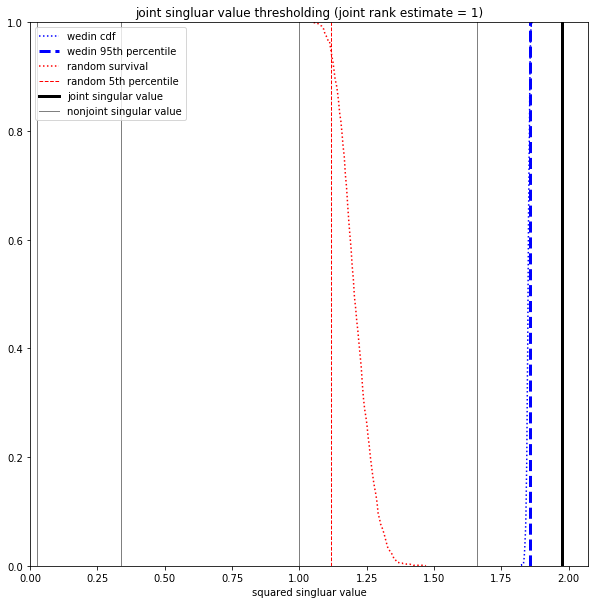

In [6]:
jive.plot_joint_diagnostic()

The x-axis of the above plot measures squared singular values

- solid black, vertical lines show the singular values of the joint basis matrix M (equation 6 in the AJIVE paper)
    - the lighter lines correspond to singular values below the threshold (i.e. not apart of the joint space)
    - the lighter lines correspond to singular values above the threshold (i.e. included in the joint space)
    

- the dotted red/blue curves show the survival/cdf of the sampled radom/wedin bounds
    - survival curve = 1 - CDF
    - the y axis shows the probabilities for these two functions
    
    
- the dashed red/blue lines show the thresholds for the random/wedin bound distributions (set to 5th/95th percentiles)
    - the darker of these two is the bound that actually gets used (wedin in this case)
